In [24]:
# Import libraries: pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re,string,unicodedata

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import nltk
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sjsam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sjsam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data=pd.read_csv(r'C:\Users\sjsam\Downloads\dataset\dataset.csv')
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
data.sample(5)

review sentiment
31902  I am surprised that so many comments about thi...  negative
10443  I happen to have read all of Junji Ito's Engli...  positive
12480  In an era where nearly every great horror film...  positive
43841  These are the kinds of movies I loved, and sti...  positive
9305   Brought Philip Larkin to life in a way that is...  positive

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

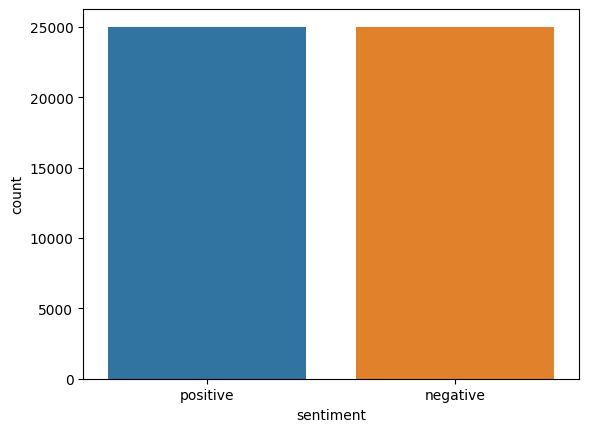

In [7]:
sns.countplot(x='sentiment',data = data)
plt.show()

We have a balanced dataset with **11,278 labeled 1** observations and **11,222 labeled 0** observations.

In [8]:
wl = WordNetLemmatizer()
stop = stopwords.words('english')

In [9]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [10]:
#function to clean data
def clean_text(text,lemmatize = True):
    soup = BeautifulSoup(text, "html.parser") #remove html tags
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    #tokens = re.split('\W+', text) #create tokens
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stop and word.isalpha()]) 
    return text

In [11]:
data_copy = data.copy()

In [12]:
data['review']=data['review'].apply(clean_text,lemmatize = True)

In [13]:
#converting target variable to numeric labels
data.sentiment = [ 1 if each == "positive" else 0 for each in data.sentiment]

In [14]:
#after converting labels
data.head()

review  sentiment
0  one reviewer mentioned watching oz episode hoo...          1
1  wonderful little production filming technique ...          1
2  thought wonderful way spend time hot summer we...          1
3  basically family little boy jake think zombie ...          0
4  petter matteis love time money visually stunni...          1

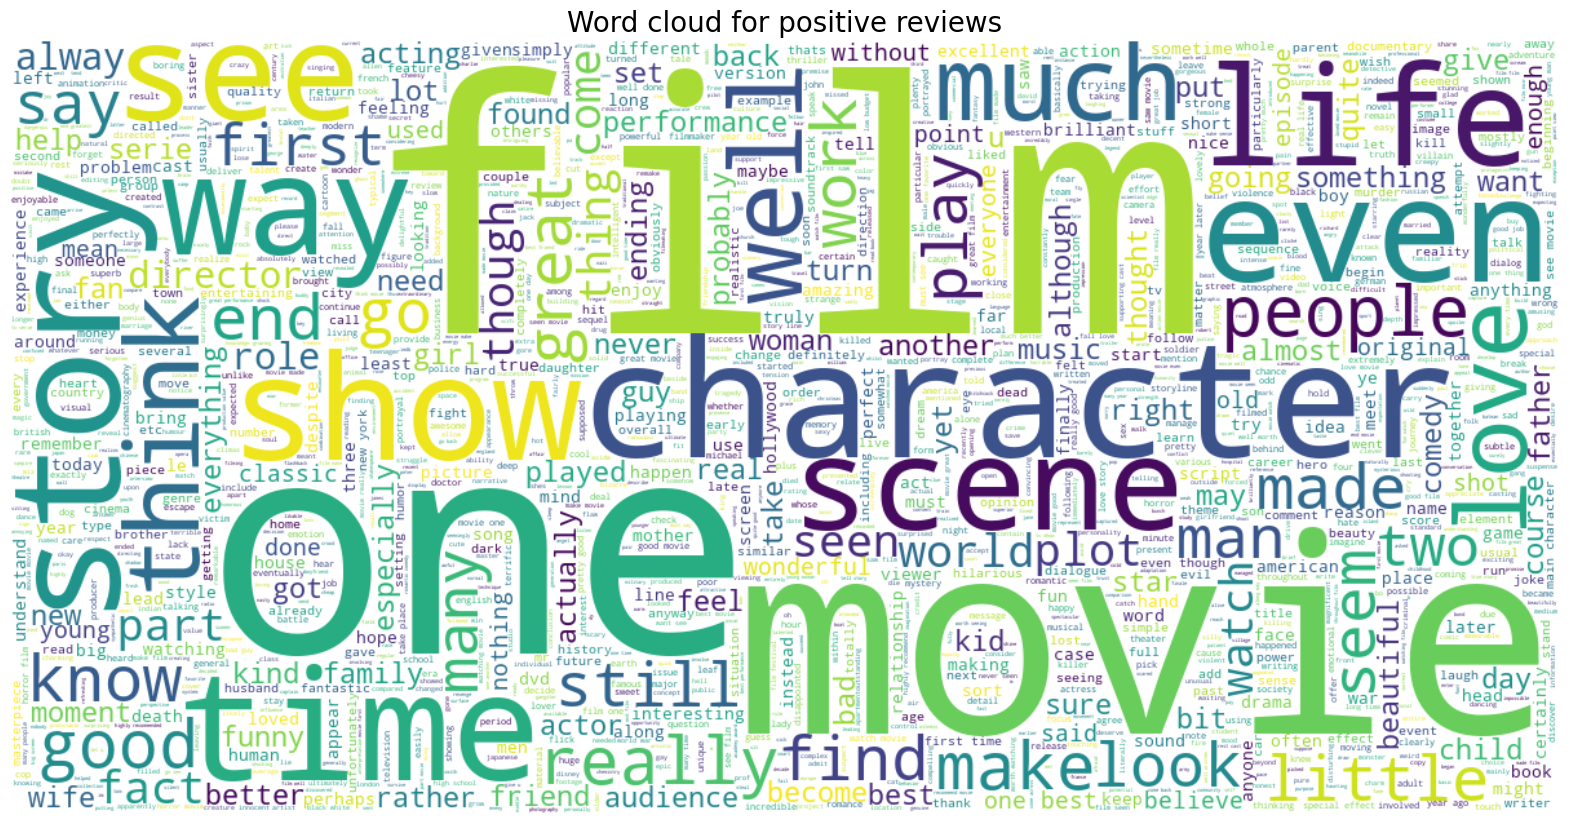

In [15]:
#word cloud for positive reviews
positive_data = data[data.sentiment == 1]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

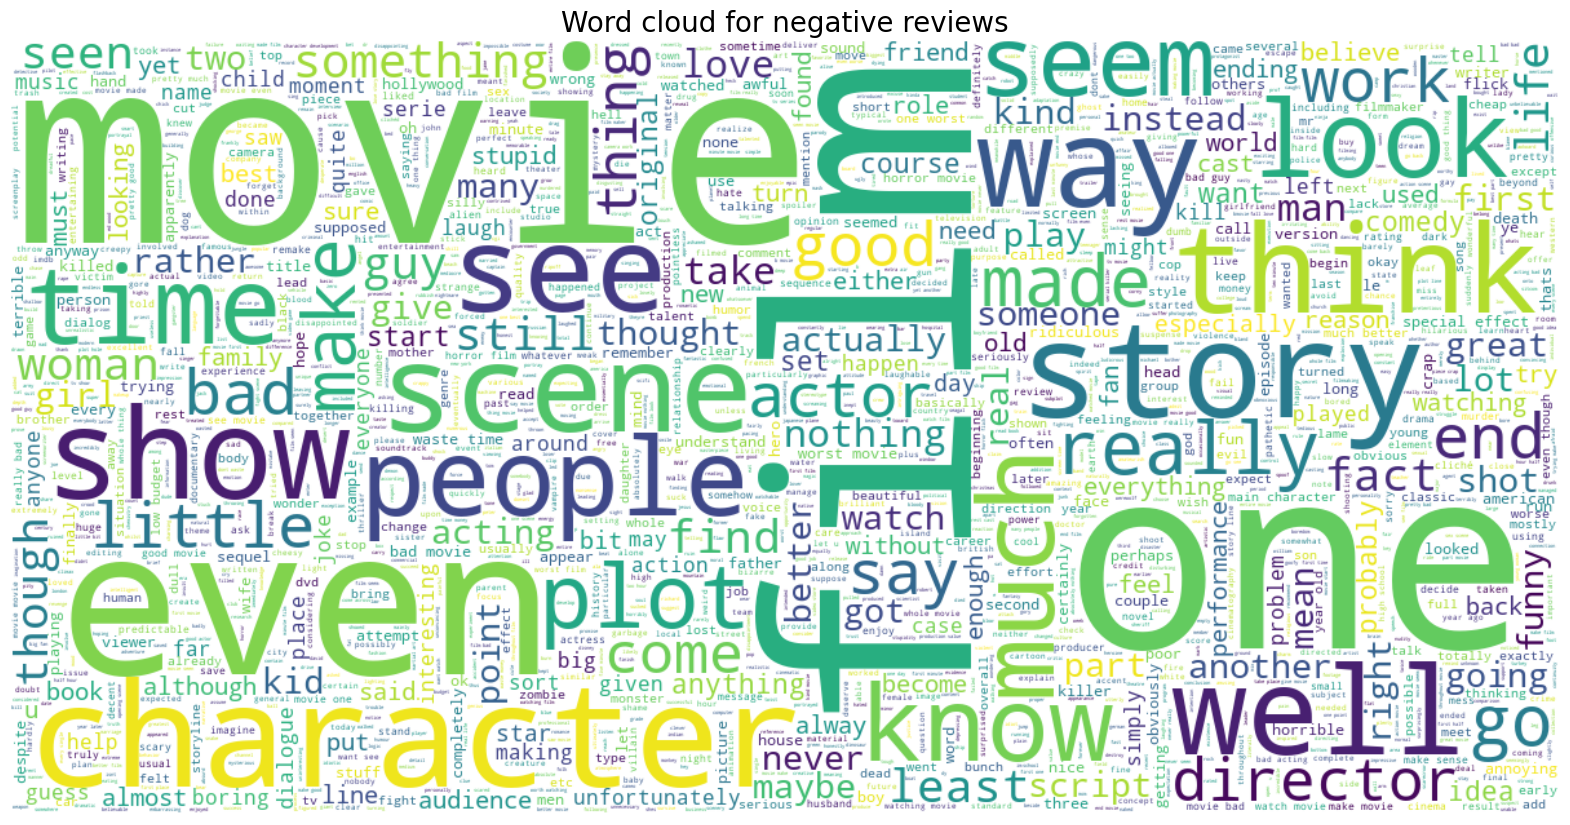

In [16]:
#word cloud for negative reviews
negative_data = data[data.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

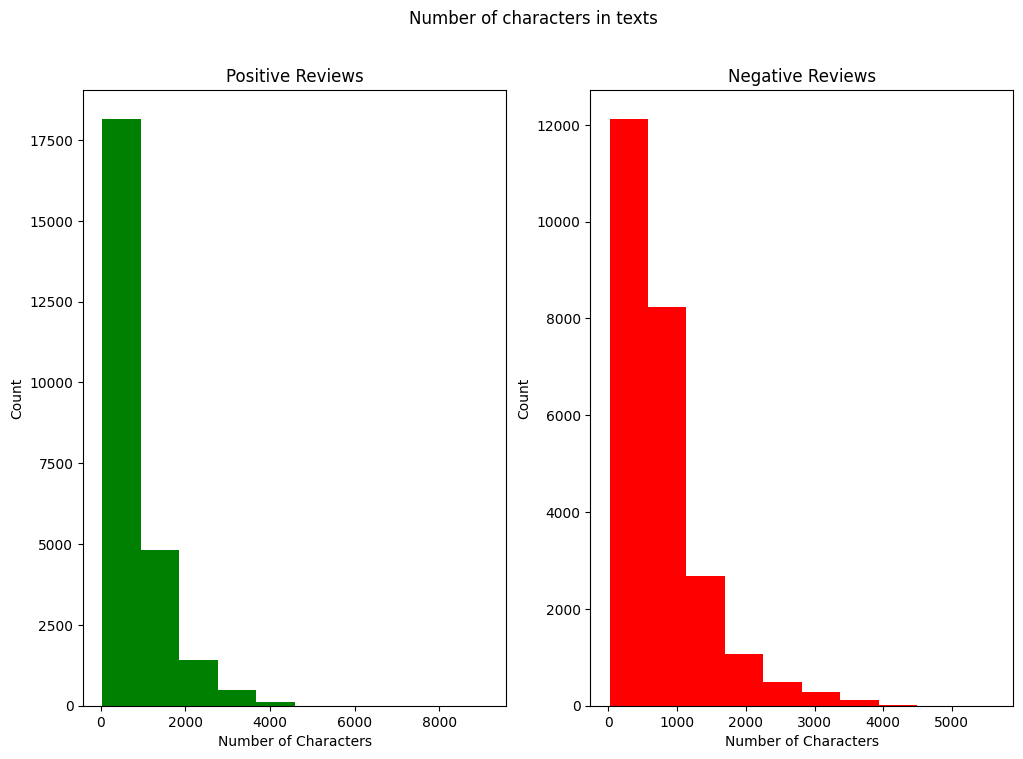

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

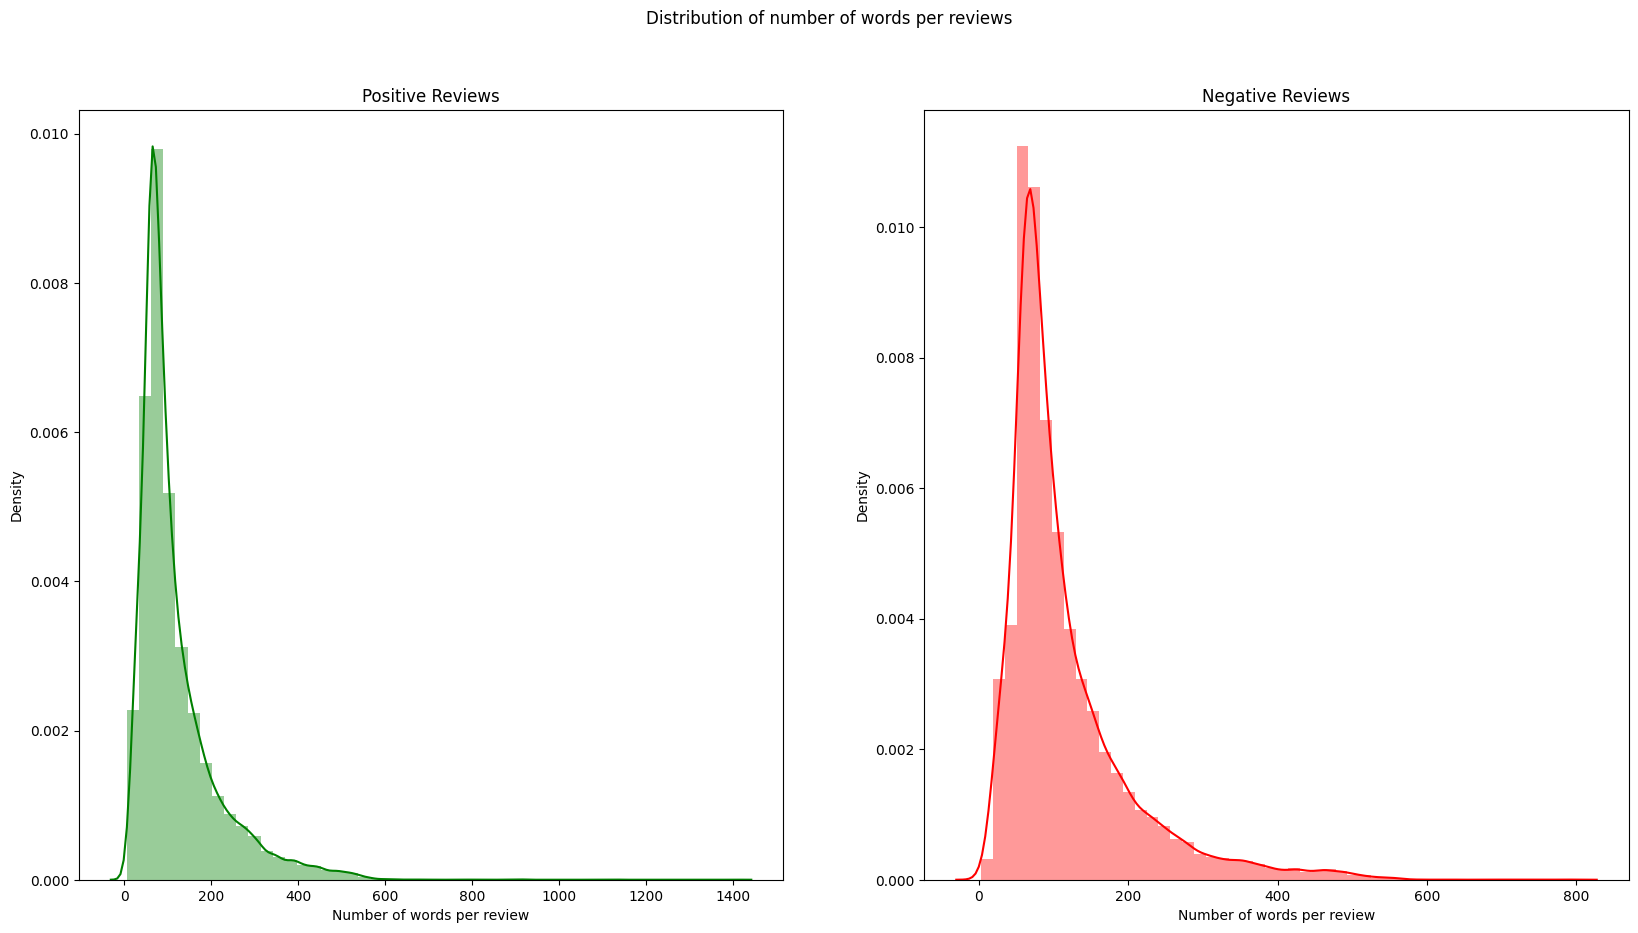

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

In [19]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(data.review)
corpus[:5]

['one', 'reviewer', 'mentioned', 'watching', 'oz']

In [20]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

corpus  countv
0      movie  101366
1       film   91761
2        one   53928
3       like   40082
4       time   30344
5      would   30285
6       good   29108
7  character   28035
8      story   24760
9       even   24642

In [21]:
most_common = most_common.sort_values('countv')

In [22]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

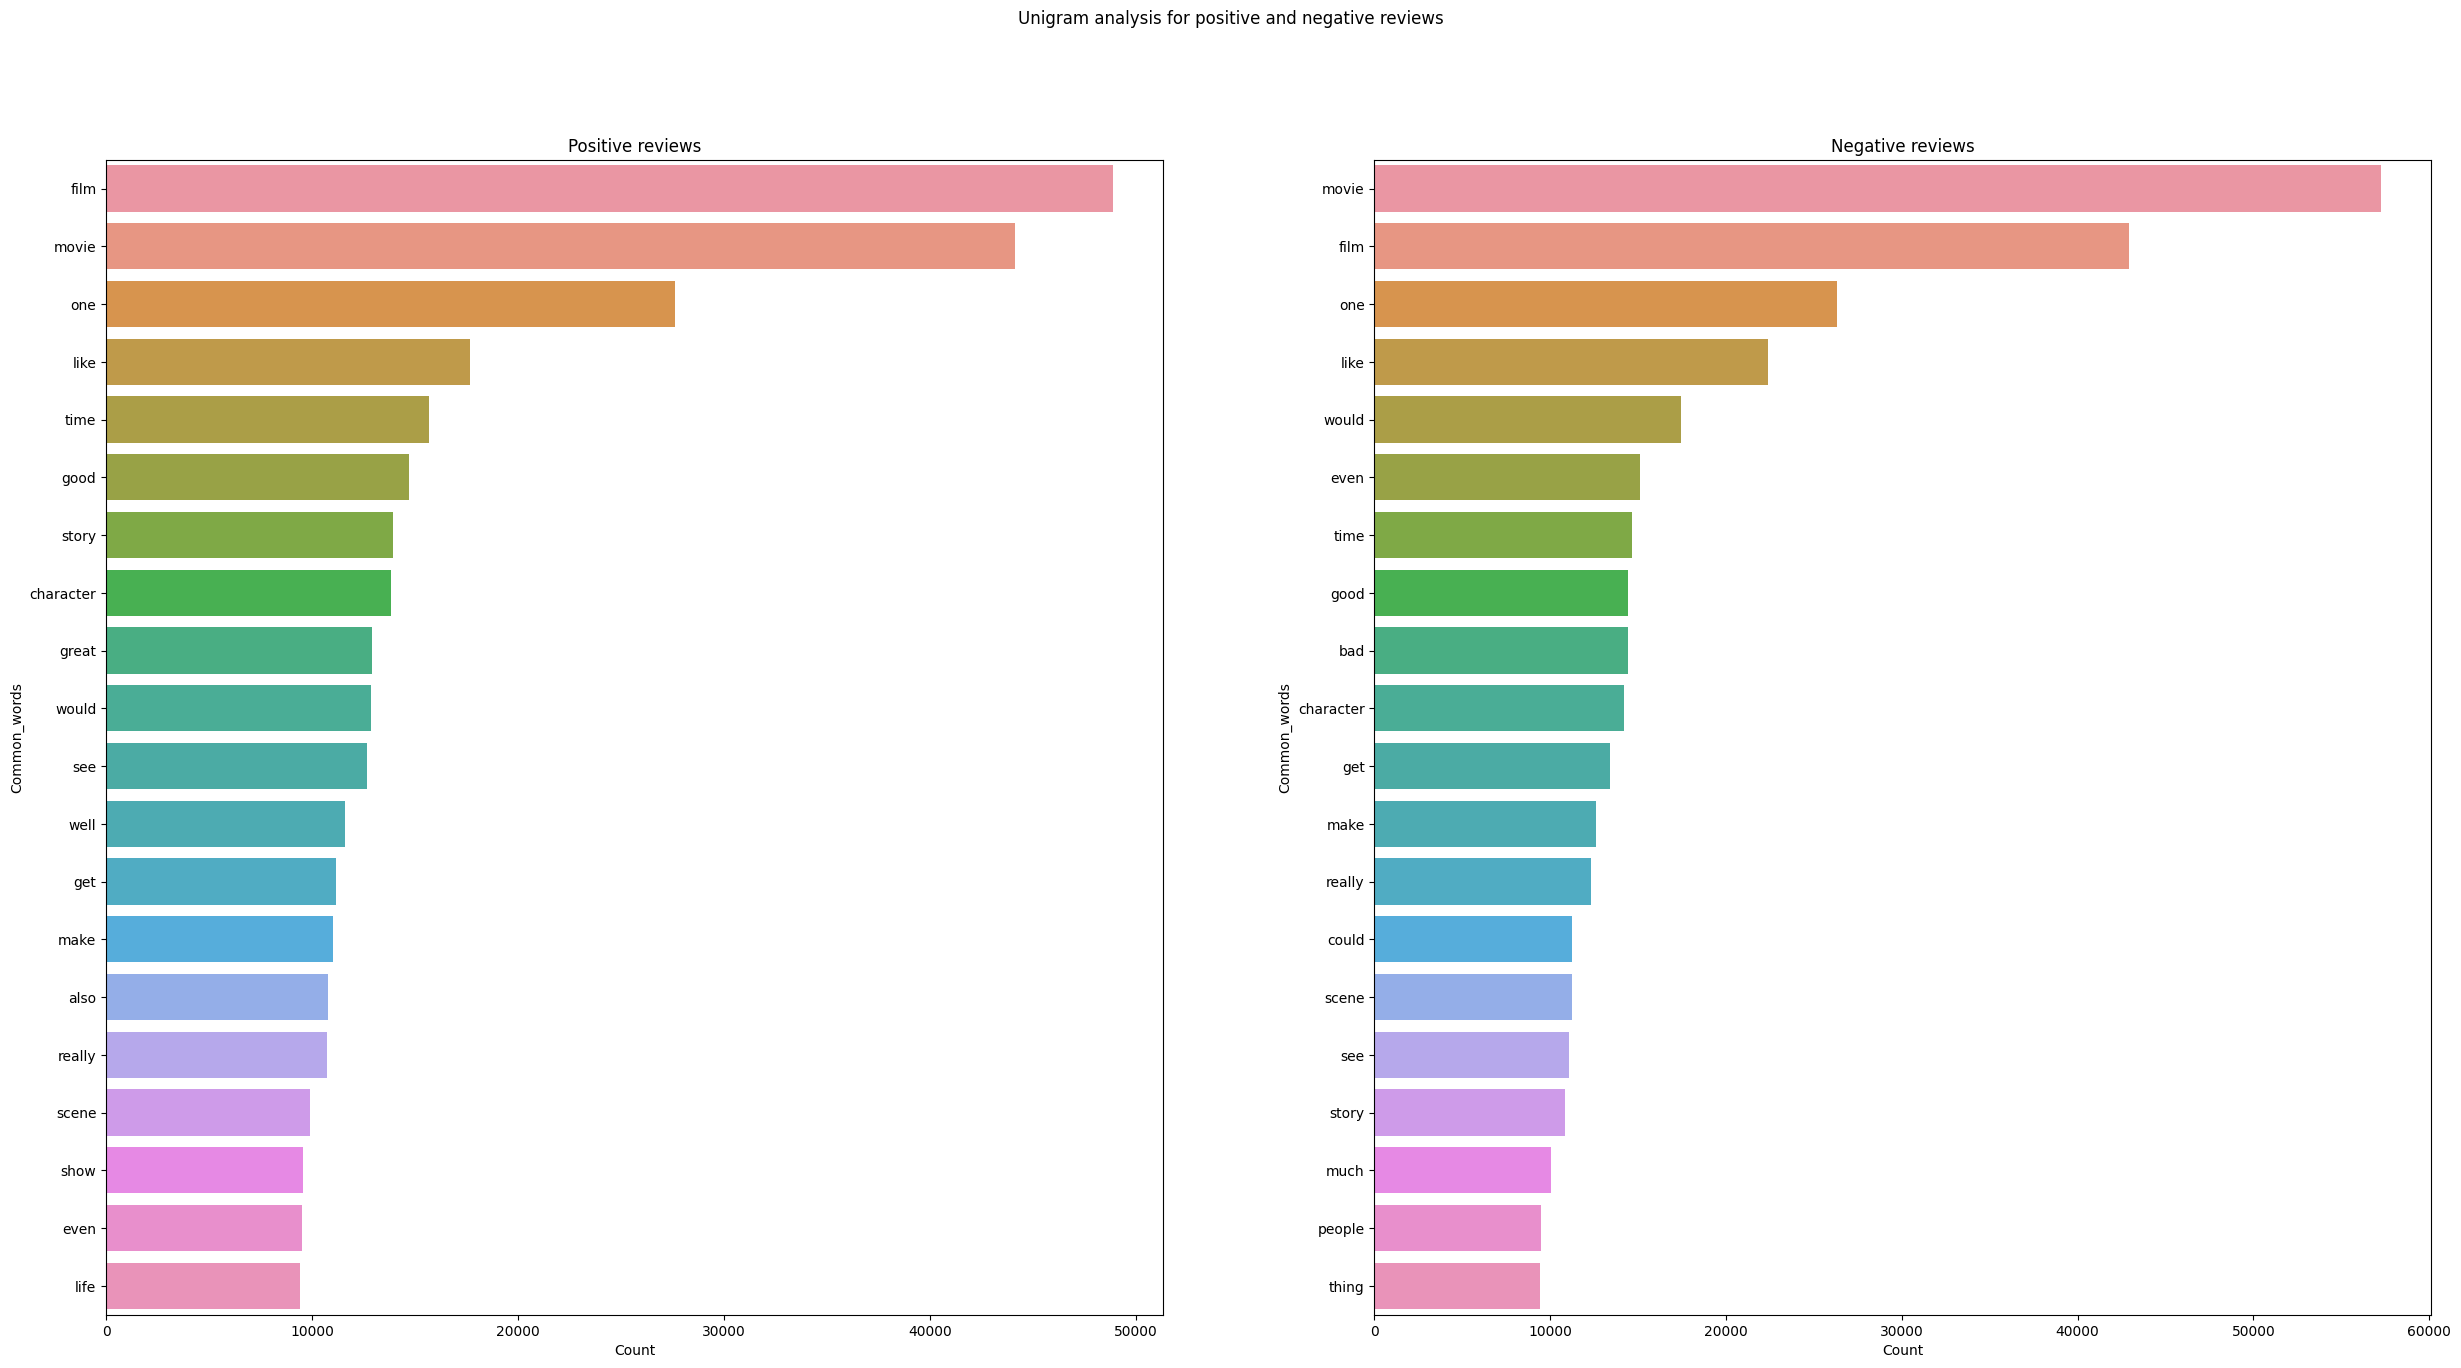

In [25]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()


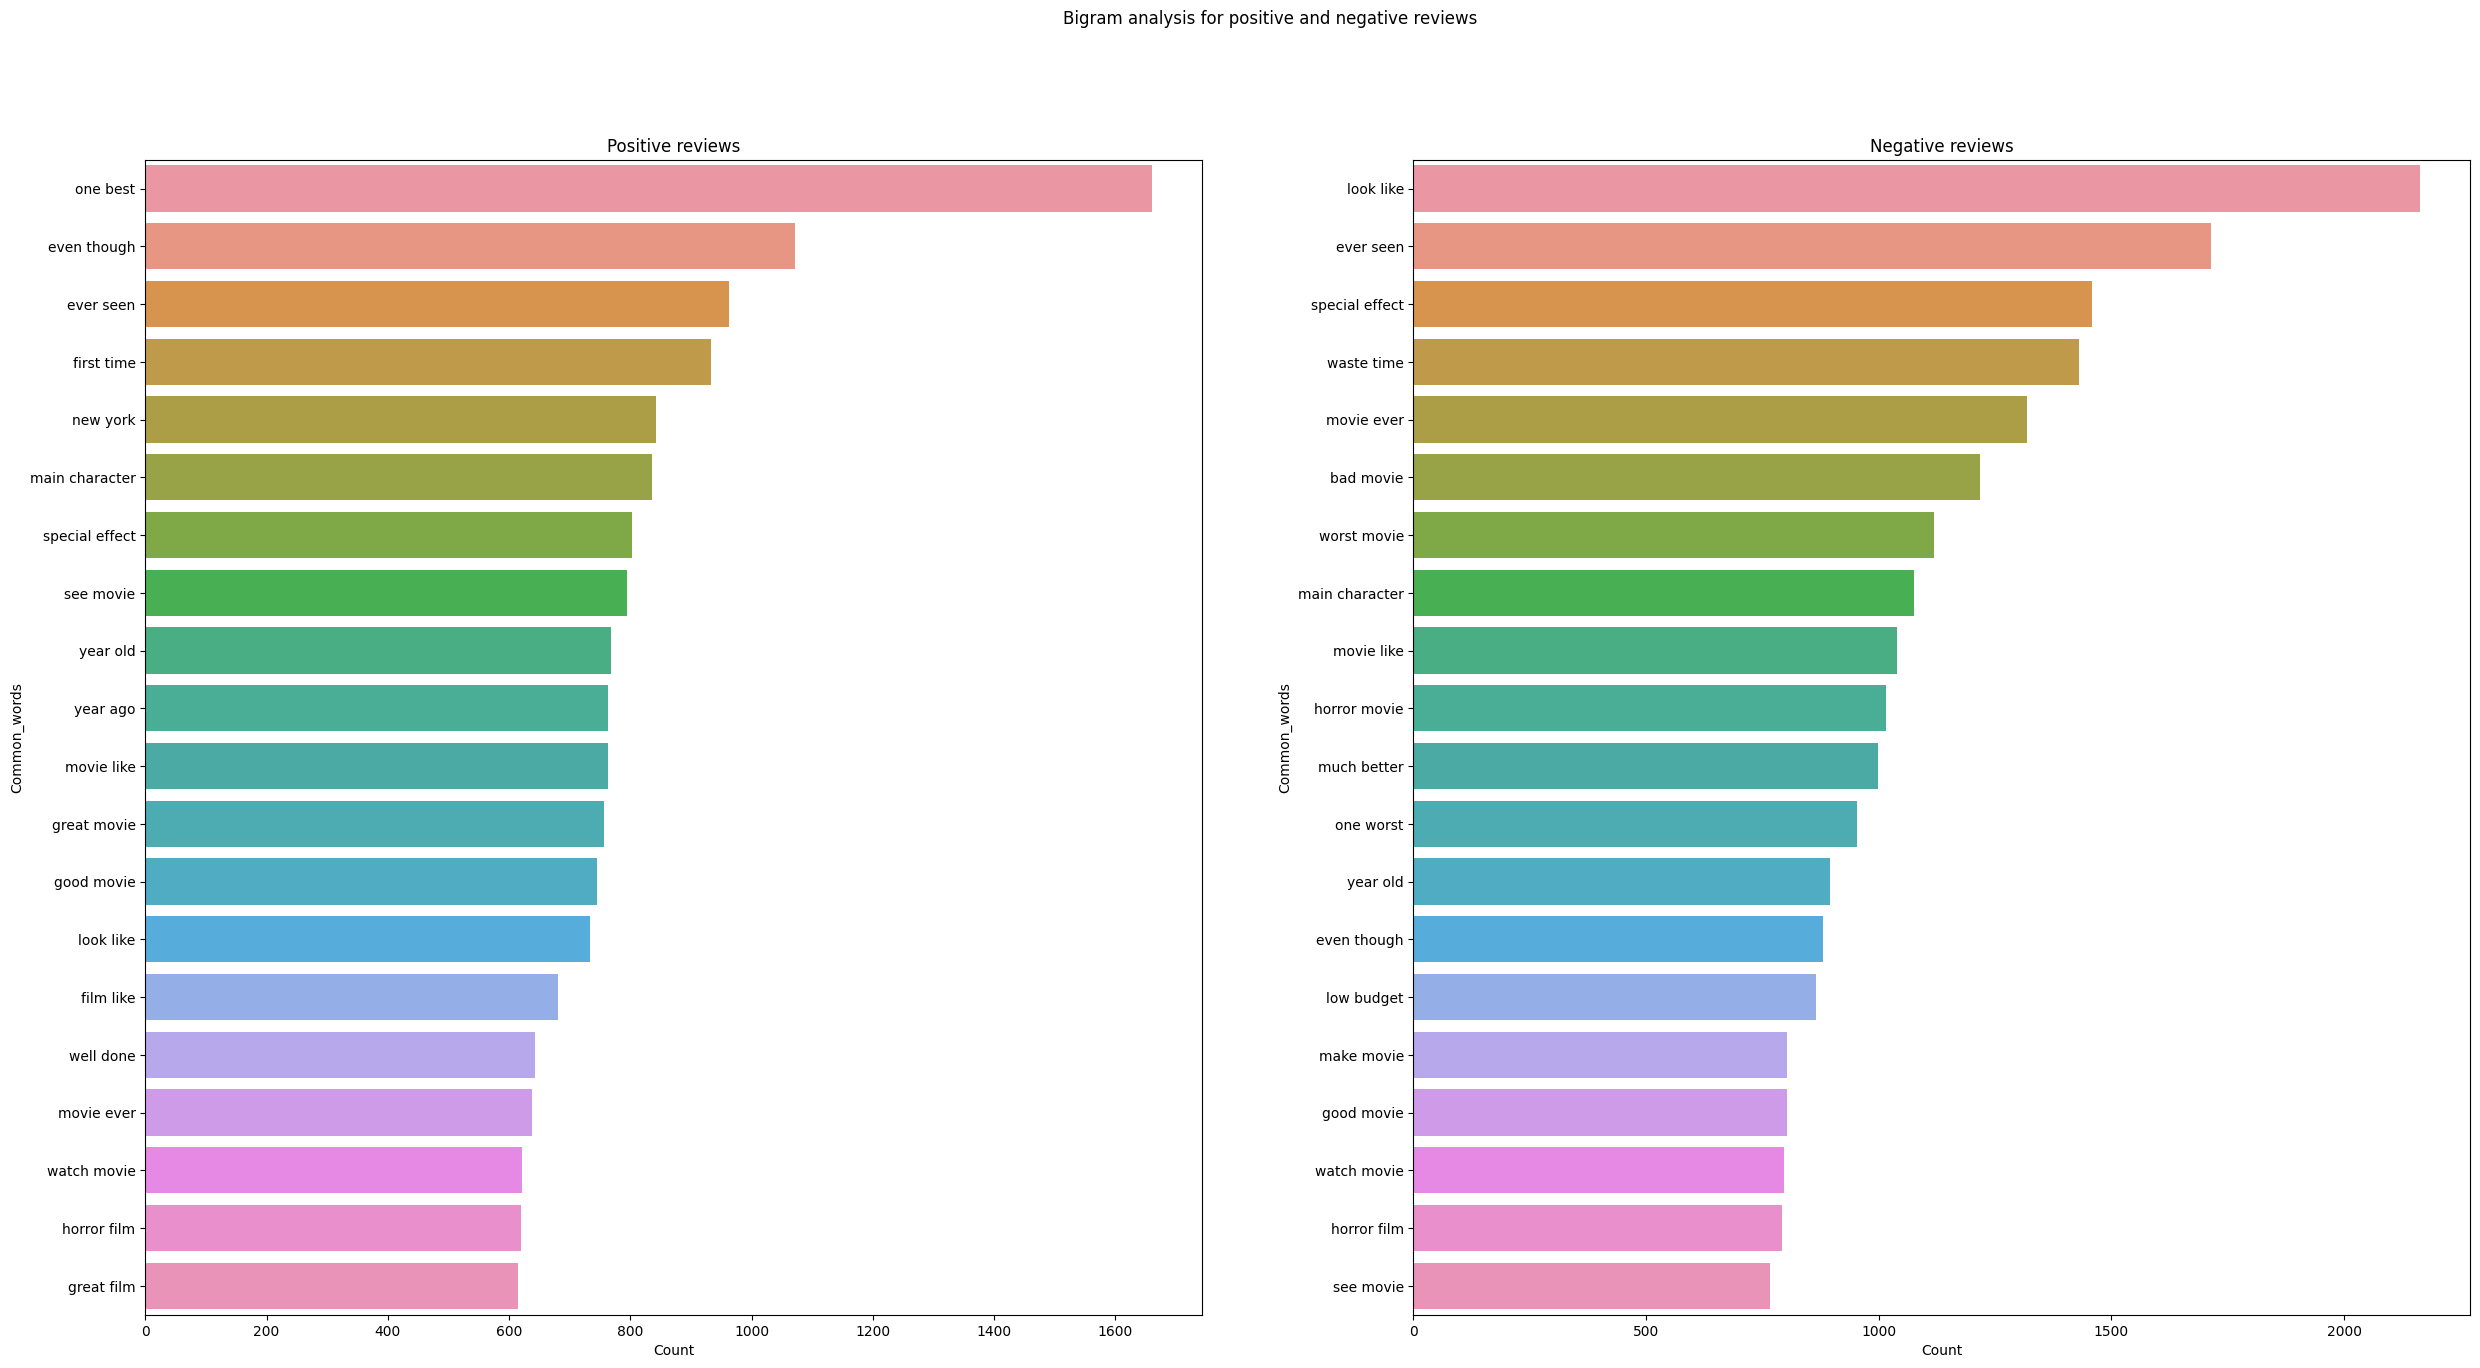

In [26]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

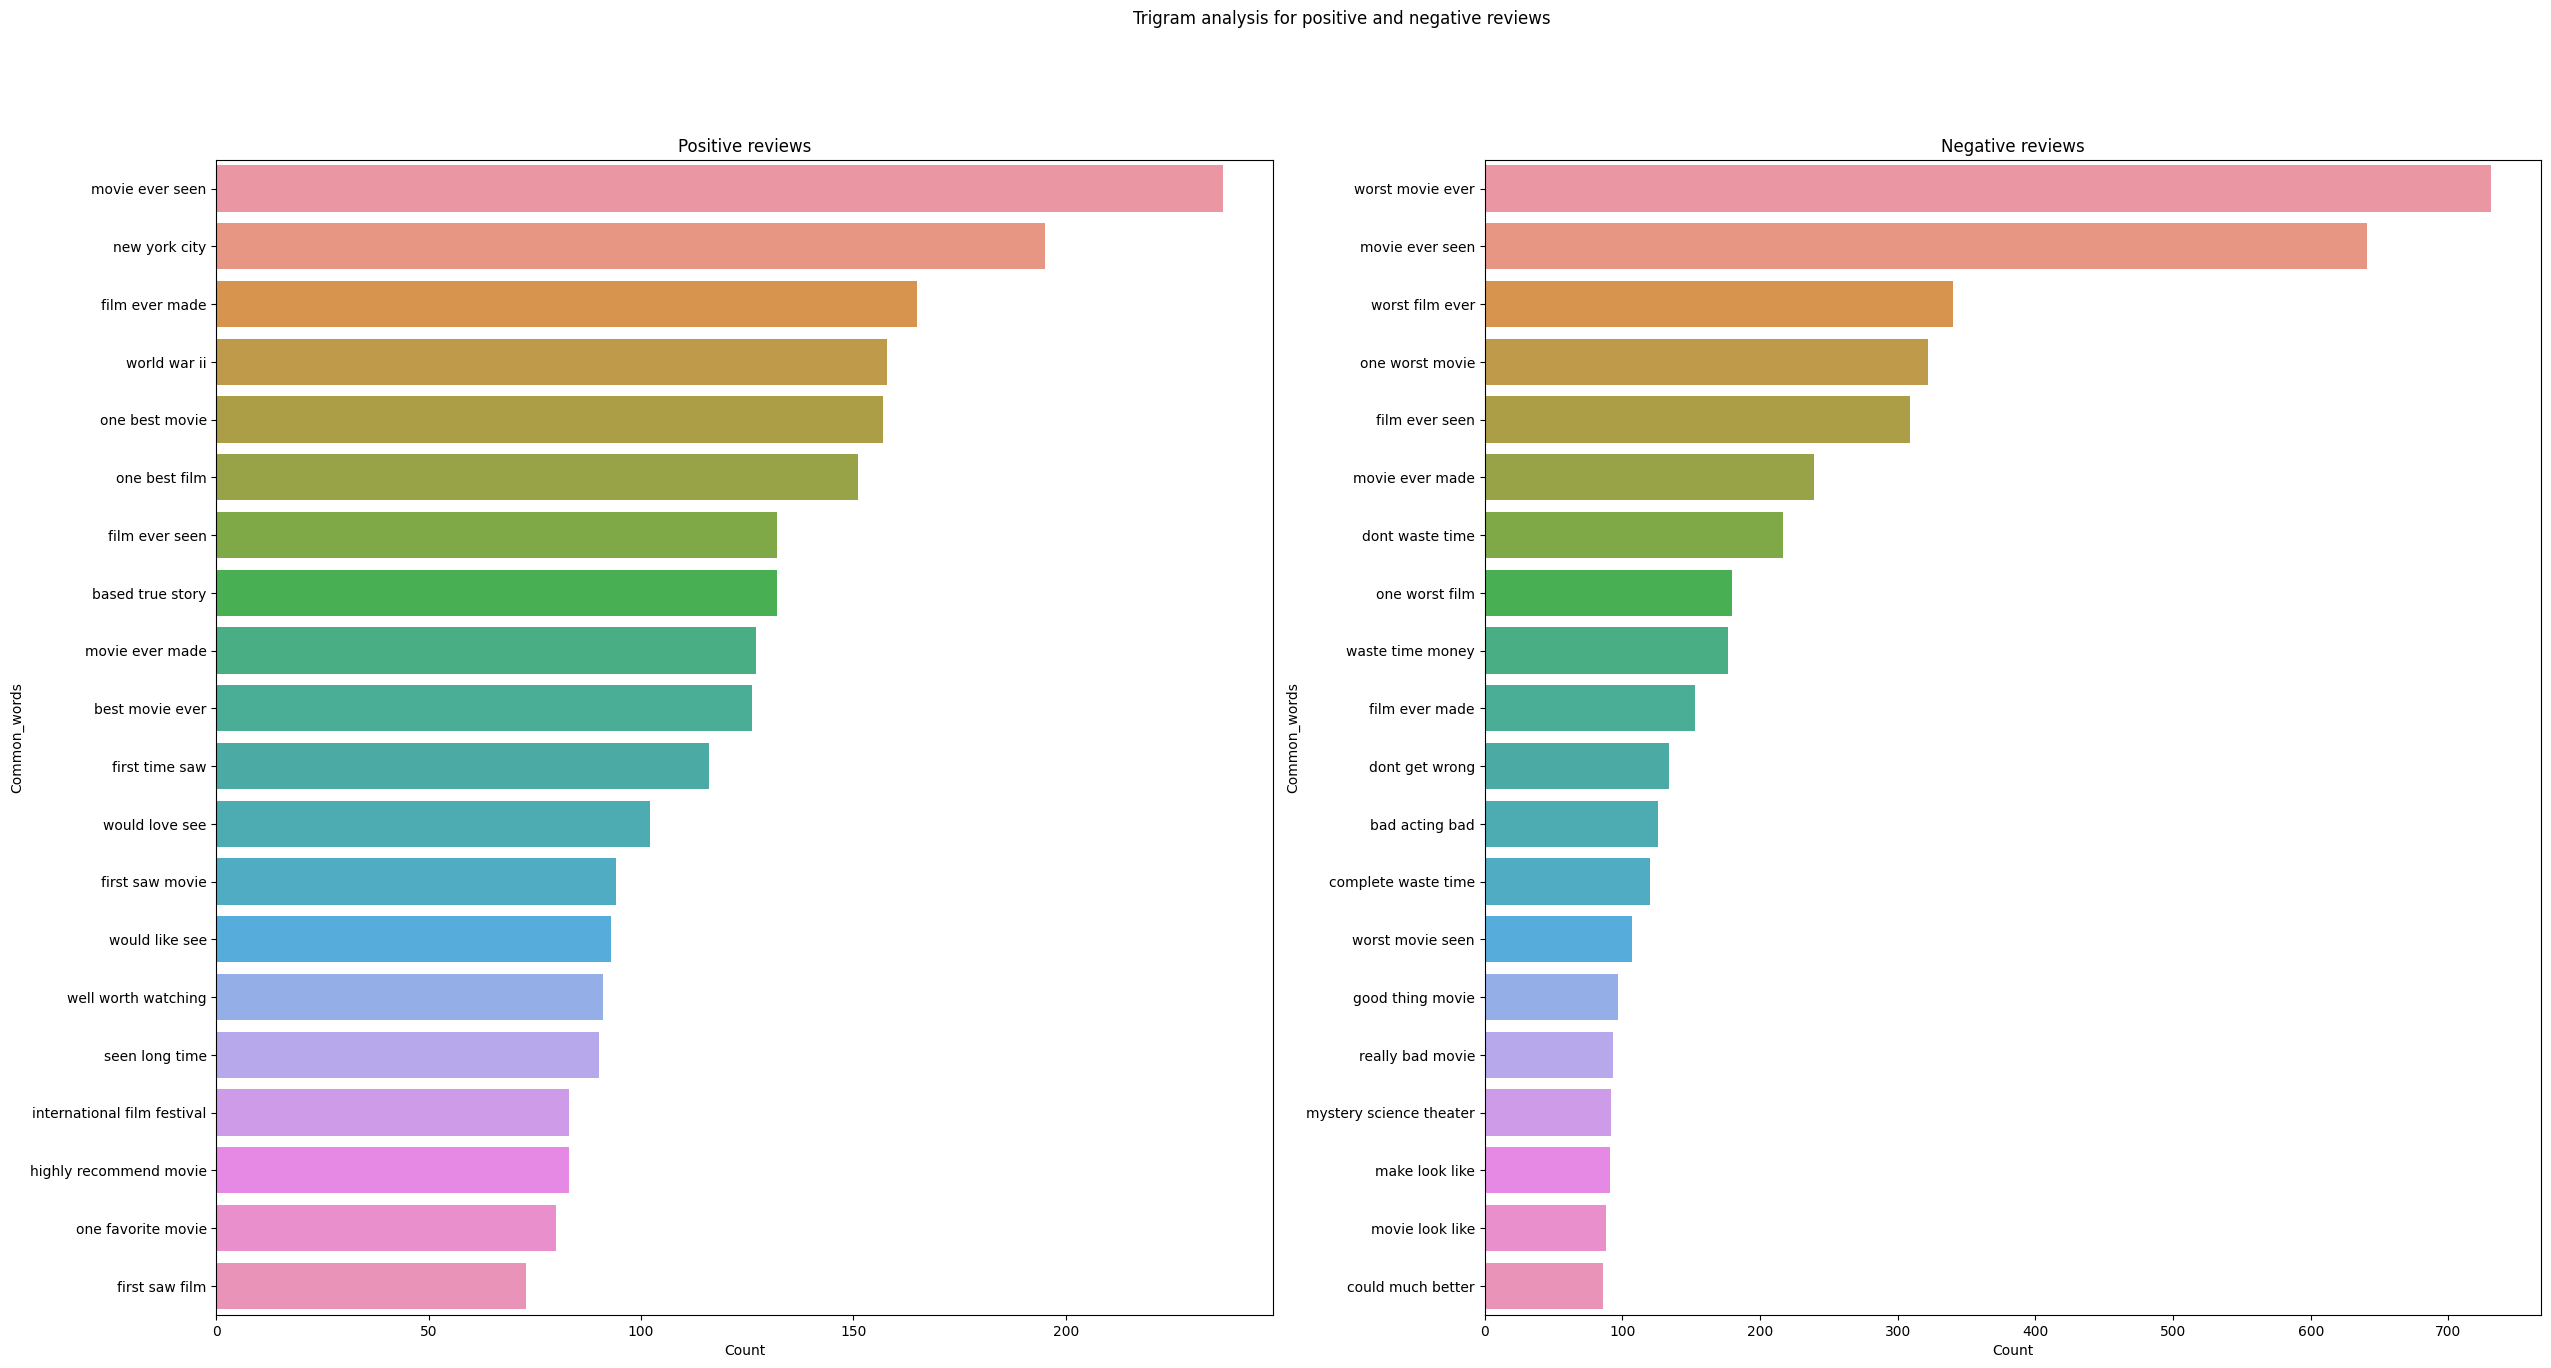

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

## Step 1: Data Clean up

In [ ]:
def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [ ]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(text):
    token = []
    for word in text.split():
        token.append(porter.stem(word))
    
    return token

## Step 2: Representation

In [ ]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

from sklearn.model_selection import train_test_split

X = data['review'] 
y = data['sentiment']

my_additional_stop_words = []

stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state = 101)

In [ ]:
X_train 

<15750x50478 sparse matrix of type '<class 'numpy.float64'>'
	with 1465529 stored elements in Compressed Sparse Row format>

## Step 3: Classification

We train our algorithm by several models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
predictions = clf.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
print('The classification report is:','\n',classification_report(y_test,predictions))


The accuracy score is: 0.884
The confusion matrix is: 
 [[2932  476]
 [ 307 3035]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      3408
           1       0.86      0.91      0.89      3342

   micro avg       0.88      0.88      0.88      6750
   macro avg       0.88      0.88      0.88      6750
weighted avg       0.89      0.88      0.88      6750



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
dtc_predictions = dtc.predict(X_test)

In [ ]:
print('The accuracy score is:',accuracy_score(y_test,dtc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_predictions))
print('The classification report is:','\n',classification_report(y_test,dtc_predictions))

The accuracy score is: 0.7088888888888889
The confusion matrix is: 
 [[2416  992]
 [ 973 2369]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      3408
           1       0.70      0.71      0.71      3342

   micro avg       0.71      0.71      0.71      6750
   macro avg       0.71      0.71      0.71      6750
weighted avg       0.71      0.71      0.71      6750



### Random Forest

**Baseline Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
rfc_predictions = rfc.predict(X_test)

In [ ]:
print('The accuracy score is:',accuracy_score(y_test,rfc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,rfc_predictions))
print('The classification report is:','\n',classification_report(y_test,rfc_predictions))

The accuracy score is: 0.732
The confusion matrix is: 
 [[2770  638]
 [1171 2171]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      3408
           1       0.77      0.65      0.71      3342

   micro avg       0.73      0.73      0.73      6750
   macro avg       0.74      0.73      0.73      6750
weighted avg       0.74      0.73      0.73      6750



**Tunning Model**

[0.6170171095453064, 0.7131426685889863, 0.7486354587274427, 0.7685081726558053, 0.7858409381345307, 0.8015879134999322, 0.8200634876867148, 0.83790503606379, 0.844761852517005, 0.8457144512624327, 0.8526351346731532]


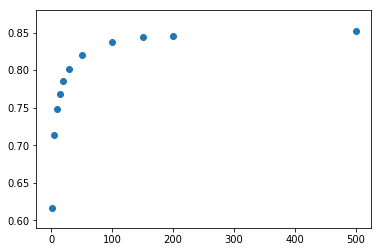

In [ ]:
#K-fold cross validation should be used to tune the model
from sklearn.model_selection import cross_val_score

n = [1 ,5 ,10, 15, 20, 30, 50, 100, 150, 200, 500]
val_results = []

for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    val_results.append(cross_val_score(clf, X_train, y_train,cv=3).mean())
    
plt.scatter(n, val_results)
print(val_results)

In [ ]:
final_rfc = RandomForestClassifier(n_estimators=200)

final_rfc.fit(X_train, y_train)
final_predictions = final_rfc.predict(X_test)

In [ ]:
print('The accuracy score is:',accuracy_score(y_test,final_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,final_predictions))
print('The classification report is:','\n',classification_report(y_test,final_predictions))

The accuracy score is: 0.8428148148148148
The confusion matrix is: 
 [[2797  571]
 [ 490 2892]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      3368
           1       0.84      0.86      0.84      3382

   micro avg       0.84      0.84      0.84      6750
   macro avg       0.84      0.84      0.84      6750
weighted avg       0.84      0.84      0.84      6750



### Gaussian Naive Bayes

**Gaussian Naive Bayes** is a good classification for text. The asumption is that the features follow the Gaussian distribution (normal distribution). We do not achive good model because our data's features do not follow the Gaussian distribution.

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = MultinomialNB()

gnb.fit(X_train, y_train)

gnb_predictions = gnb.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,gnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,gnb_predictions))
print('The classification report is:','\n',classification_report(y_test,gnb_predictions))

The accuracy score is: 0.8622222222222222
The confusion matrix is: 
 [[2953  455]
 [ 475 2867]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      3408
           1       0.86      0.86      0.86      3342

   micro avg       0.86      0.86      0.86      6750
   macro avg       0.86      0.86      0.86      6750
weighted avg       0.86      0.86      0.86      6750



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = GaussianNB()

gnb.fit(X_train.toarray(), y_train)

gnb_predictions = gnb.predict(X_test.toarray())

print('The accuracy score is:',accuracy_score(y_test,gnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,gnb_predictions))
print('The classification report is:','\n',classification_report(y_test,gnb_predictions))

The accuracy score is: 0.6687407407407407
The confusion matrix is: 
 [[2567  841]
 [1395 1947]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.65      0.75      0.70      3408
           1       0.70      0.58      0.64      3342

   micro avg       0.67      0.67      0.67      6750
   macro avg       0.67      0.67      0.67      6750
weighted avg       0.67      0.67      0.67      6750



### KNN (K Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

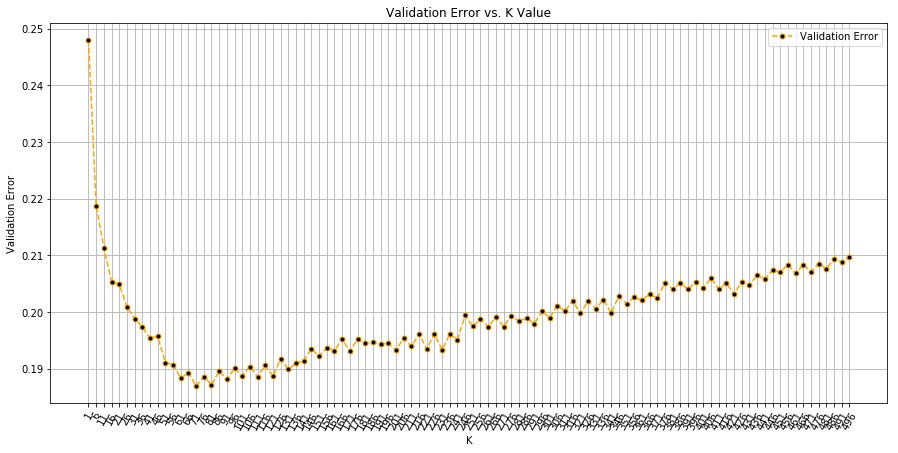

In [ ]:
### Tuning using K-fold Cross Validation

from sklearn.model_selection import cross_val_score

val_error_rate = []
neighbors_range = range(1,500,5)

for i in neighbors_range:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    val_error = 1 - cross_val_score(knn, X_train, y_train,cv=5).mean()
    val_error_rate.append(val_error)

# Plot settings
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')
plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

In [ ]:
best_k = neighbors_range[val_error_rate.index(min(val_error_rate))]
best_k

71

The accuracy score is: 0.8065185185185185
The classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      3384
           1       0.80      0.81      0.81      3366

   micro avg       0.81      0.81      0.81      6750
   macro avg       0.81      0.81      0.81      6750
weighted avg       0.81      0.81      0.81      6750



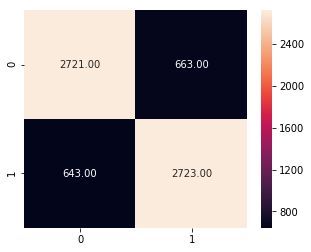

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,knn_predictions))
print('The classification report is:','\n',classification_report(y_test,knn_predictions))

matrix=confusion_matrix(y_test,knn_predictions)
plt.figure(figsize = (5,4))
sns.heatmap(matrix, annot=True, fmt = '.2f')

### SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

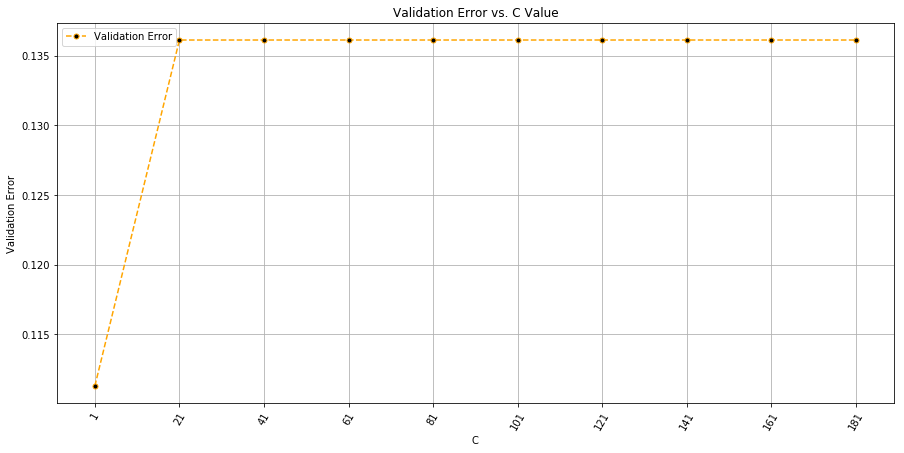

In [ ]:
from sklearn.model_selection import cross_val_score

val_rate = []
c_range =  range(1,200,20)

for i in c_range:
    
    svm = SVC(C=i, kernel='linear')
    
    val_error = 1 - cross_val_score(svm, X_train, y_train,cv=5).mean()
    val_rate.append(val_error)


# Plot settings
plt.figure(figsize=(15,7))
plt.plot(c_range, val_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')

plt.xticks(np.arange(c_range.start, c_range.stop, c_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. C Value')
plt.xlabel('C')
plt.ylabel('Validation Error')
plt.show()

In [ ]:
best_c = c_range[val_rate.index(min(val_rate))]
best_c

**Perform SVM with C = 1 and C = 3**

In [ ]:
svm = SVC(kernel='linear',C=1).fit(X_train, y_train)

In [ ]:
svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred = svm.predict(X_test)

In [ ]:
print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

The accuracy score is: 0.8814814814814815
The confusion matrix is: 
 [[2965  443]
 [ 357 2985]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3408
           1       0.87      0.89      0.88      3342

   micro avg       0.88      0.88      0.88      6750
   macro avg       0.88      0.88      0.88      6750
weighted avg       0.88      0.88      0.88      6750



In [ ]:
svm = SVC(kernel='linear',C=3).fit(X_train, y_train)

In [ ]:
svm.fit(X_train, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred = svm.predict(X_test)

In [ ]:
print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

The accuracy score is: 0.8765925925925926
The confusion matrix is: 
 [[2970  438]
 [ 395 2947]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      3408
           1       0.87      0.88      0.88      3342

   micro avg       0.88      0.88      0.88      6750
   macro avg       0.88      0.88      0.88      6750
weighted avg       0.88      0.88      0.88      6750



## Step 4: Performing Features Selection
### Selecting features by Chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import VarianceThreshold

# Reshape X_train, X_test by fit_transform
X_new_train = SelectKBest(chi2, k=45000).fit_transform(X_train, y_train)
X_new_test = SelectKBest(chi2, k=45000).fit_transform(X_test, y_test)

# Build Logistic Regression Model and check accuracy
clf.fit(X_new_train, y_train)

new_predictions = clf.predict(X_new_test)

print('The accuracy score is:',accuracy_score(y_test,new_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,new_predictions))
print('The classification report is:','\n',classification_report(y_test,new_predictions))


The accuracy score is: 0.7644444444444445
The confusion matrix is: 
 [[2591  817]
 [ 773 2569]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      3408
           1       0.76      0.77      0.76      3342

   micro avg       0.76      0.76      0.76      6750
   macro avg       0.76      0.76      0.76      6750
weighted avg       0.76      0.76      0.76      6750



We tried to perform Features Selection for the dataset, however, this step doesn't improve the accuracy because it can accidently remove important words

### Manually selecting features
We investigate which words negatively affected the accuracy and add those words to the `stop words`

In [ ]:
my_additional_stop_words = []

stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

import nltk

# Add tag to word inside the vectorized dictionary
Pos_tag = nltk.pos_tag(tfidf.vocabulary_.keys())

# Create dataframe of words and words's tags
word_bag = pd.DataFrame(Pos_tag, columns = ['Word' , 'Type'])

# We focus on word with tag NN (Nouns)
NN_list = word_bag['Word'][word_bag['Type']=='NN'].tolist()

remove_word = []
X = data['review']
y = data['sentiment']

for word in NN_list:
    my_additional_stop_words.append(word)
    stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
    
    tfidf = TfidfVectorizer(stop_words=stop,
                            tokenizer=tokenizer_porter,
                            preprocessor=preprocessor)

    X_tfidf = tfidf.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3,random_state = 101) 
    
    # Build logistic Regression Model
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # Check if the accuracy of the model improved after removing the word
    # The accuracy of model is 0.884 for random_state = 101
    if accuracy_score(y_test,predictions) > 0.884:
        remove_word.append(word)
        print(word)
        my_additional_stop_words = []
    else:
        my_additional_stop_words = []

After that step, we get the list of words that can be removed in order to improve the accuracy of Logistic Regression Model.



## Step 5: Improving Model by adding more stop words



In [ ]:
my_additional_stop_words = ['stuff', 'mj', 'start', 'music', 'odd', 'documentari', 'guy', 'cool', 'mind', 
                            'innoc', 'film', 'messag', 'm', 'impress', 'cours', 'hate', 'movi', 'onli', 
                            'minut', 'crimin', 'sequenc', 'whi', 'becaus', 'peopl', 'thing', 'turn', 
                            'director', 'kid', 'danc', 'line', 'level', 'tri', 't', 'veri', 'goe', 'effort', 
                            'succe', 'standard', 'predict', 'year', 'tom', 'look', 'everyth', 'rate', 
                            'import', 'easi', 'use', 'creatur', 'tourist', 'meanwhil', 'secur', 'center', 
                            'pre', 'hardli', 'group', 'gore', 'hair', 'scare', 'stori', 'provid', 'gener', 
                            'becom', 'actor', 'realist', 'r', 'angel', 'david', 'curti', 'pictur', 'badli', 
                            'previou', 'televis', 'journey', 'man', 'assum', 'didn', 'care', 'cultur', 
                            'song', 'strike', 'disast', 'score', 'question', 'matter', 'decid', 'titl', 
                            'kind', 'face', 'sometim', 'couldn', 'mountain', 'juli', 'sort', 'review', 
                            'credit', 'fear', 'dialog', 'pervert', 'cover', 'sister', 'bodi', 'judg', 
                            'parent', 'plot', 'twist', 'bonker', 'reason', 'mouth', 'chick', 'fall', 'love', 
                            'surviv', 'rest', 'locat', 'harri']

stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = data['review']
y = data['sentiment']

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=101)

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = clf.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
print('The classification report is:','\n',classification_report(y_test,predictions))

The accuracy score is: 0.8881481481481481
The confusion matrix is: 
 [[2951  457]
 [ 298 3044]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      3408
           1       0.87      0.91      0.89      3342

   micro avg       0.89      0.89      0.89      6750
   macro avg       0.89      0.89      0.89      6750
weighted avg       0.89      0.89      0.89      6750



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

dtc_predictions = dtc.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,dtc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_predictions))
print('The classification report is:','\n',classification_report(y_test,dtc_predictions))

The accuracy score is: 0.7197037037037037
The confusion matrix is: 
 [[2436  972]
 [ 920 2422]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      3408
           1       0.71      0.72      0.72      3342

   micro avg       0.72      0.72      0.72      6750
   macro avg       0.72      0.72      0.72      6750
weighted avg       0.72      0.72      0.72      6750



### Random Forest(`n_estimators = 200` )

In [ ]:
from sklearn.ensemble import RandomForestClassifier

final_rfc = RandomForestClassifier(n_estimators=200)

final_rfc.fit(X_train, y_train)
final_predictions = final_rfc.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,final_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,final_predictions))
print('The classification report is:','\n',classification_report(y_test,final_predictions))

The accuracy score is: 0.8573333333333333
The confusion matrix is: 
 [[2866  542]
 [ 421 2921]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      3408
           1       0.84      0.87      0.86      3342

   micro avg       0.86      0.86      0.86      6750
   macro avg       0.86      0.86      0.86      6750
weighted avg       0.86      0.86      0.86      6750



### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = GaussianNB()

gnb.fit(X_train.toarray(), y_train)

gnb_predictions = gnb.predict(X_test.toarray())

print('The accuracy score is:',accuracy_score(y_test,gnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,gnb_predictions))
print('The classification report is:','\n',classification_report(y_test,gnb_predictions))

The accuracy score is: 0.6688888888888889
The confusion matrix is: 
 [[2567  841]
 [1394 1948]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.65      0.75      0.70      3408
           1       0.70      0.58      0.64      3342

   micro avg       0.67      0.67      0.67      6750
   macro avg       0.67      0.67      0.67      6750
weighted avg       0.67      0.67      0.67      6750



### Multinomial Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = MultinomialNB()

gnb.fit(X_train, y_train)

gnb_predictions = gnb.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,gnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,gnb_predictions))
print('The classification report is:','\n',classification_report(y_test,gnb_predictions))

The accuracy score is: 0.8622222222222222
The confusion matrix is: 
 [[2938  470]
 [ 460 2882]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      3408
           1       0.86      0.86      0.86      3342

   micro avg       0.86      0.86      0.86      6750
   macro avg       0.86      0.86      0.86      6750
weighted avg       0.86      0.86      0.86      6750



### KNN (`k=71`)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=71)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,knn_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,knn_predictions))
print('The classification report is:','\n',classification_report(y_test,knn_predictions))

The accuracy score is: 0.8139259259259259
The confusion matrix is: 
 [[2802  606]
 [ 650 2692]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      3408
           1       0.82      0.81      0.81      3342

   micro avg       0.81      0.81      0.81      6750
   macro avg       0.81      0.81      0.81      6750
weighted avg       0.81      0.81      0.81      6750



### SVM (`C=1`)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',C=1).fit(X_train, y_train)

svm.fit(X_train, y_train)
pred = svm.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

The accuracy score is: 0.8837037037037037
The confusion matrix is: 
 [[2971  437]
 [ 348 2994]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      3408
           1       0.87      0.90      0.88      3342

   micro avg       0.88      0.88      0.88      6750
   macro avg       0.88      0.88      0.88      6750
weighted avg       0.88      0.88      0.88      6750



### Save the Optimized Model


In [ ]:
import pickle
import os

pickle.dump(clf, open(os.path.join('.', 'model.pkl'), 'wb'), protocol=4)

## Step 6: Use optimized Model to predict Unlabeled data

In [ ]:
data2 = pd.read_csv(r'C:\Users\sjsam\Downloads\dataset\test_data.csv',sep='\t',encoding='latin-1')
data2.head(10)

id                                             review
0  10633_1  I watched this video at a friend's house. I'm ...
1   4489_1  `The Matrix' was an exciting summer blockbuste...
2  3304_10  This movie is one among the very few Indian mo...
3   3350_3  The script for this movie was probably found i...
4   1119_1  Even if this film was allegedly a joke in resp...
5   6827_4  Dumb is as dumb does, in this thoroughly unint...
6   9788_9  I was at the same screenwriters conference and...
7   2395_7  Though it had the misfortune to hit the festiv...
8   1782_4  A charming boy and his mother move to a middle...
9  11232_1  IT IS So Sad. Even though this was shot with f...

In [ ]:
X_2 = data2['review']

In [ ]:
X_2_tfidf = tfidf.fit_transform(X)
predictions_y2 = clf.predict(X_2_tfidf)

In [ ]:
predictions_y2

array([1, 1, 0, ..., 0, 0, 1])

### Models Performance Summary


| Models | Additional conditions |Accuracy (before features selection) | Accuracy (after features selection)|
| --- | --- | --- | --- |
| * **Logistic Regression** |---  | **0.884** |**0.8881481481481481**|
| Logistic Regression |`chi2, k=45000`  | --- | 0.7644444444444445 |
| Decision Tree |---  | 0.7094814814814815 | **0.7197037037037037** |
| Random Forest | default | 0.7585185185185185 | --- |
| Random Forest | `n_estimators = 200` | 0.8428148148148148 | **0.8573333333333333** |
| KNN | `k=71` | 0.8065185185185185 | **0.8139259259259259** |
| SVM | `C=1` | 0.8814814814814815 | **0.8837037037037037** |
| SVM | `C=3` | 0.8765925925925926 | --- |
| Multinomial Gaussian Naive Bayes | --- | 0.8622222222222222 | 0.8622222222222222 |
| Gaussian Naive Bayes | --- | 0.6687407407407407 | **0.6688888888888889** |


## CONCLUSION

* Sentiment classification methods above identify texts from the review dataset according to the users opinions toward movies, which are both negative and positive. The extracted data is further enhanced using feature classification techniques and these methopologies facilitate the keywords from the users reviews. After training and testing the dataset, **Logistic Regression** has the **best result** compared to the other methods.
* We successfully **improve the accuracy** of our baseline models by **adding more stop words**.